In [2]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [3]:
data = dt.get_data('NHBE', 'healthy', 'sars-cov2', series = (1,))
columns_healthy = dt.get_columns('NHBE', 'healthy', series = (1,))
columns_sars_cov2 = dt.get_columns('NHBE', 'sars-cov2', series = (1,))

filtered_data = dt.get_p_values('mannwhitneyu', data, columns_healthy, columns_sars_cov2)
filtered_data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,p-value
SMIM1,1.609438,1.791759,1.945910,2.079442,2.397895,2.484907,0.040428
CA6,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.029673
C1orf127,0.000000,0.000000,0.000000,1.098612,1.386294,0.693147,0.031801
WNT4,4.262680,4.553877,4.615121,5.209486,4.844187,5.451038,0.040428
IFI6,3.912023,4.521789,3.637586,5.337538,5.455321,6.816736,0.040428
...,...,...,...,...,...,...,...
SLC6A14,6.714171,6.579251,7.250636,7.445418,7.371489,8.591187,0.040428
MIR503,1.386294,1.098612,1.098612,0.693147,0.000000,0.000000,0.036099
MCF2,2.397895,3.178054,3.332205,2.302585,1.609438,2.197225,0.040428
PNMA3,0.000000,0.000000,0.000000,0.693147,0.693147,1.791759,0.029673


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


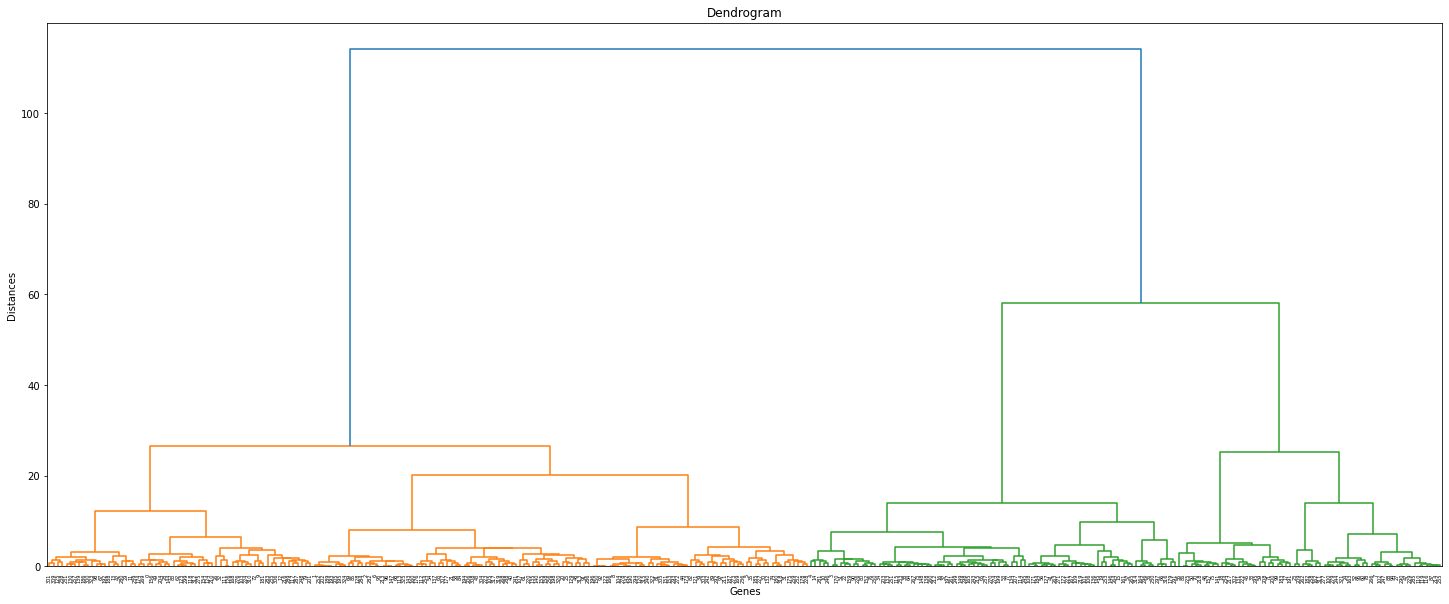

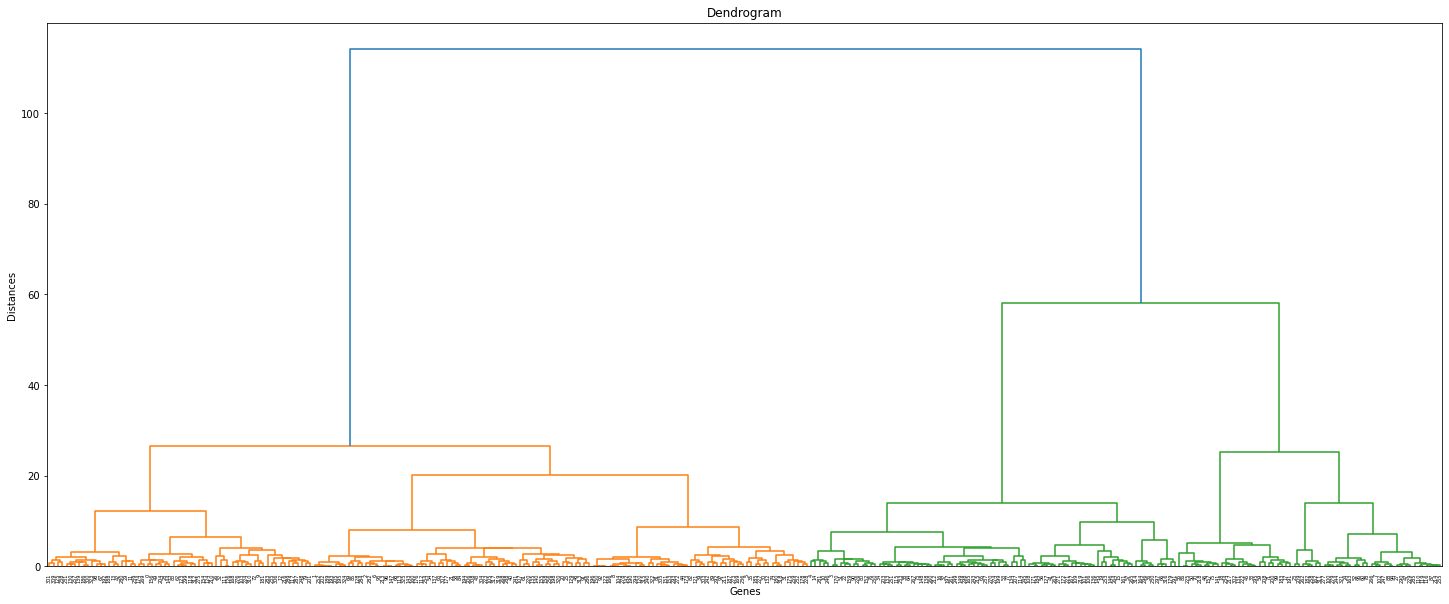

In [4]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [5]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [6]:
labels['distance']

array([0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0,
       2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2,
       0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0,

In [7]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [8]:
labels['pearson']

array([2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0,

In [9]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [10]:
labels['spearman']

array([2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2,
       0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,

In [11]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.16108487510412456
distance  vs  spearman :  0.05994568962625517
pearson  vs  distance :  0.16108487510412456
pearson  vs  spearman :  0.20773032175830752
spearman  vs  distance :  0.05994568962625517
spearman  vs  pearson :  0.20773032175830752


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [12]:
import enrichmentAnalysis as ea

results_enrichment = {'distance': [], 'pearson': [], 'spearman': []}

for cluster_type in clusters:
    for cluster in clusters[cluster_type]:
        results_enrichment[cluster_type] += [ea.getEnrichment(list(cluster), 'GO_Biological_Process_2021')['GO_Biological_Process_2021']]

results_enrichment

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value
Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlap

{'distance': [[[1,
    'positive regulation of chondrocyte differentiation (GO:0032332)',
    0.001049178217319043,
    50.83524904214559,
    348.7170015767893,
    ['ZBTB16', 'HOXA11'],
    0.2026690963242785,
    0,
    0],
   [2,
    'negative regulation of neuron projection development (GO:0010977)',
    0.002202435530101012,
    12.593657505285412,
    77.05040794784807,
    ['LINGO1', 'MCF2', 'NGEF'],
    0.2026690963242785,
    0,
    0],
   [3,
    'aorta morphogenesis (GO:0035909)',
    0.0025496928011489745,
    30.491954022988505,
    182.0913142909148,
    ['HEY2', 'MYLK'],
    0.2026690963242785,
    0,
    0],
   [4,
    'muscle tissue morphogenesis (GO:0060415)',
    0.0025496928011489745,
    30.491954022988505,
    182.0913142909148,
    ['HEY2', 'MYLK'],
    0.2026690963242785,
    0,
    0],
   [5,
    'positive regulation of cartilage development (GO:0061036)',
    0.0028601279131244485,
    28.58477011494253,
    167.41782366085732,
    ['ZBTB16', 'HOXA11'],
    0

In [13]:
import json

with open('results_NHBE.json', 'w') as file:
     file.write(json.dumps(results_enrichment)) # use `json.loads` to do the reverse

In [14]:
import json

with open('results_NHBE.json') as file:
    results_enrichment = json.load(file)

In [17]:
dataset = {'p-value': [], 'Score': [], 'Cluster': []}
index = []

for cluster_num in range(len(results_enrichment['distance'])):
    for term in results_enrichment['distance'][cluster_num]:
        index += [term[1]]
        dataset['p-value'] += [term[6]]
        dataset['Score'] += [term[4]]
        dataset['Cluster'] += [cluster_num]
enrichment_dataset = pd.DataFrame(dataset, index = index)

In [19]:
pd.set_option("display.max_rows", None)
selection = enrichment_dataset[enrichment_dataset['p-value'] < 0.01].sort_values('Score', ascending = False).head(25)

selection['p-value'] = selection['p-value'].map(lambda x: '%.2E' % x)
selection['Score'] = selection['Score'].map(lambda x: '%.2f' % x)

selection.to_csv('NHBE_table.csv')
selection

,p-value,Score,Cluster
regulation of calcidiol 1-monooxygenase activity (GO:0060558),1.83E-03,1610.66,1
pantothenate metabolic process (GO:0015939),1.83E-03,1610.66,1
cellular response to type I interferon (GO:0071357),1.95E-12,1330.17,2
type I interferon signaling pathway (GO:0060337),1.95E-12,1330.17,2
postsynaptic neurotransmitter receptor internalization (GO:0098884),9.96E-03,865.07,2
postsynaptic endocytosis (GO:0140239),9.96E-03,865.07,2
regulation of ribonuclease activity (GO:0060700),9.96E-03,865.07,2
response to interferon-beta (GO:0035456),2.28E-06,830.41,2
defense response to symbiont (GO:0140546),9.02E-12,717.21,2
defense response to virus (GO:0051607),1.94E-11,641.59,2


## Clustering on columns

NameError: name 'title' is not defined

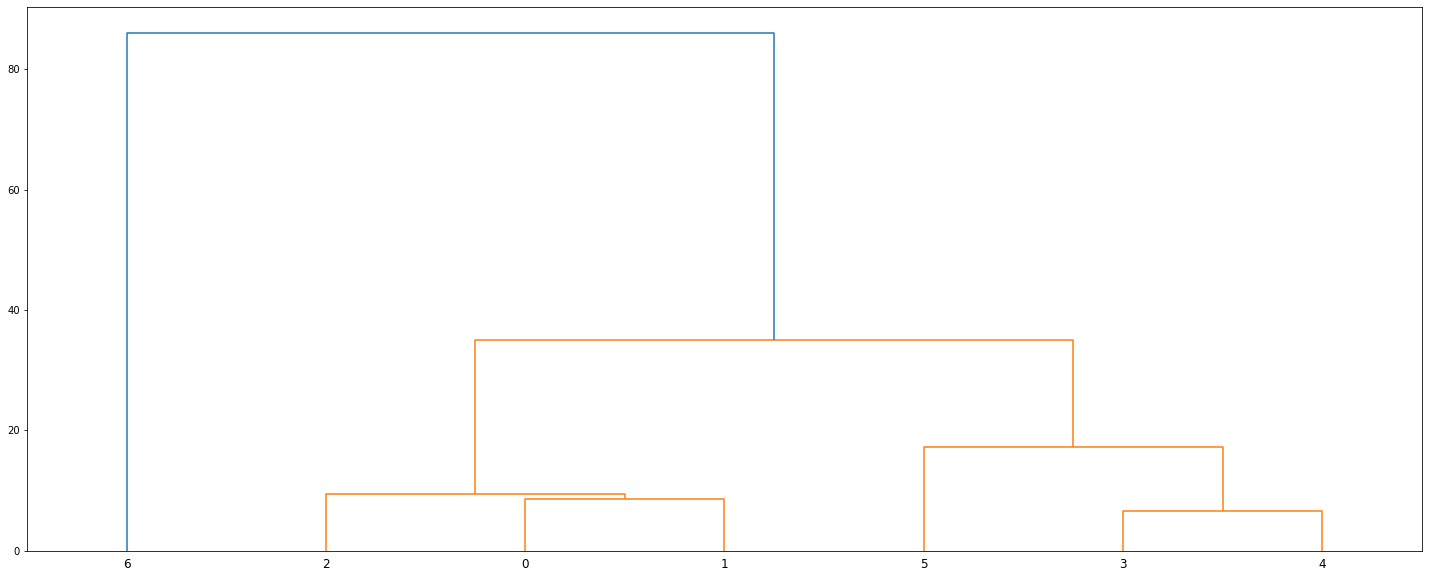

In [13]:
fig = plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(filtered_data.T, method="ward"))
plt.title(title)
plt.xlabel()
plt.ylabel('Distances')
plt.show()

In [108]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_columns['distance']

array([1, 1, 1, 0, 0, 0], dtype=int64)